## View a Knowledge Graph
#### This Jupyter notebook can be used to create a Knowledge Graph (KG) for a specific organisation name (listed below) pruned at a given depth. Run each box sequentially by clicking the play button to the left of each box.

In [9]:
import json
import helper_functions as hf

base_directory = 'data/triplets_no_cutoff'
save_directory = 'graphs/triplets_no_cutoff'

# Load the data
with open(base_directory + '/graphs.json', 'r') as file:
    results = json.load(file)

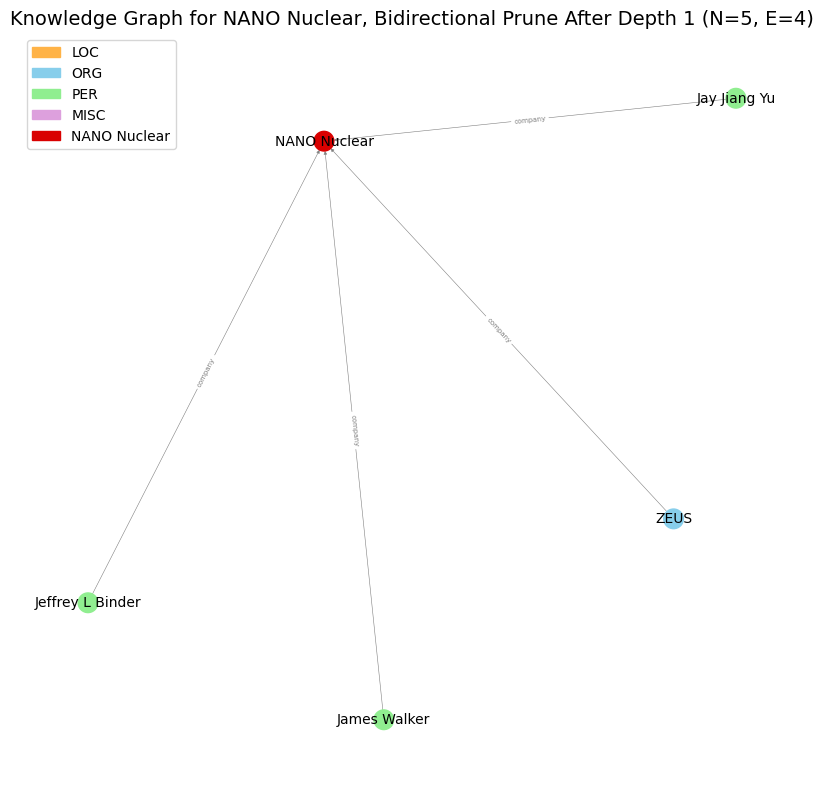

In [10]:
###############
name = 'NANO Nuclear'
# Options: 
# 'ARC', 'Babcock and Wilcox', 'Berkeley', 'BWX', 'Elysium', 'Flibe', 
# 'Framatome', 'GE Hitachi', 'General Atomics', 'HolosGen', 'Holtec International', 
# 'Hyperion Power', 'Kairos Power', 'Moltex Energy', 'NANO Nuclear', 'NuScale', 
# 'Oak Ridge National Laboratory', 'Oklo', 'StarCore Nuclear', 'TerraPower', 'Terrestial', 
# 'ThorCon', 'Ultra Safe Nuclear Corporation', 'Westinghouse', 'X-Energy'

direction = 'bidirectional' 
# Options: 'bidirectional', 'forward', 'backward', 'bidirectional_and', 'bidirectional_or'

max_depth = 1
# Options: all integers > 0 OR -1 for unpruned
###############


root_node = (name, 'ORG')
if name not in results.keys():
    raise ValueError(f"Please choose one of the listed organisation names: {name} not in results list")

G = hf.make_graph(results[name])
G_pruned = hf.prune_graph_by_depth(G, root_node, max_depth, direction)
num_nodes = G_pruned.number_of_nodes()
fig, ax = hf.view_graph(G_pruned, root_node, max_depth, direction, num_nodes)